#<font color = 'indianred'> **Learning Rate Schedules in Vision Classification**</font>

In this notebook, we'll explore the most commonly used learning rate schedules in vision classification tasks. Learning rate schedules help to adapt the learning rate during training, which can lead to better model performance.

We'll cover the following learning rate schedules:
- Epoch level
> - Step Learning Rate
> - Exponential Learning Rate
> - Cosine Aneealing Rate
 >>- Cosine Annealing with One Cycle Schedule (decay each epoch)
 >>- Cosine Annealing with Restarts
 >>- Cosine Aneealing with Warm Restarts


- Step Level
> - Cosine Annealing with One Cycle Schedule (decay each batch)
> - One Cycel LR
> - Reduce Learning Rate on Pleateau

For each schedule, we'll include a brief explanation, code example, and plot to visualize the learning rate changes over time.


## <font color = 'indianred'> **Import Libraries**

In [10]:
# Let's create a function that takes the optimizer, scheduler, epochs, and steps_per_epoch as arguments.
# This function will then plot the learning rate schedule.
import matplotlib.pyplot as plt
import torch
import numpy as np
from torch.optim.lr_scheduler import (
    StepLR,
    ExponentialLR,
    ReduceLROnPlateau,
    CosineAnnealingLR,
    CosineAnnealingWarmRestarts,
    OneCycleLR,
)

def plot_lr_values(lr_values, title, x_axis='Epoch'):
    plt.figure(figsize=(10, 4))
    plt.plot(range(len(lr_values)), lr_values, label=title)
    plt.xlabel(x_axis)
    plt.ylabel('Learning Rate')
    plt.title(f'{title} Learning Rate in PyTorch')
    plt.legend()
    plt.show()


## <font color = 'indianred'> **Epoch Level**</font>

### <font color = 'indianred'> **StepLR**</font>

```python
scheduler = StepLR(optimizer, step_size=20, gamma=0.5)
```

**Explanation:**

`StepLR` decays the learning rate of each parameter group by a factor of `gamma` every `step_size` epochs. It offers a simple and straightforward approach to learning rate scheduling.

- **optimizer**: The optimizer whose learning rate you wish to schedule. The initial learning rate is set through this optimizer object.
  
- **step_size=20**: The learning rate will be reduced every 20 epochs, contrary to the previously stated 10 epochs.
  
- **gamma=0.5**: When the learning rate is updated, it is multiplied by this factor.

**How it Works:**

1. Assume the initial learning rate is 0.1.
2. For epochs 1 to 20, the learning rate remains at 0.1.
3. At epoch 21, the learning rate is halved to 0.05.
4. For epochs 21 to 40, the learning rate remains at 0.05.
5. And so on...

**When to Use:**

The `StepLR` scheduler is effective for tasks that benefit from a predictable and regular decay in the learning rate. It's particularly useful for models that converge with a constant learning rate before requiring smaller learning rate values for fine-tuning or stabilization.

---



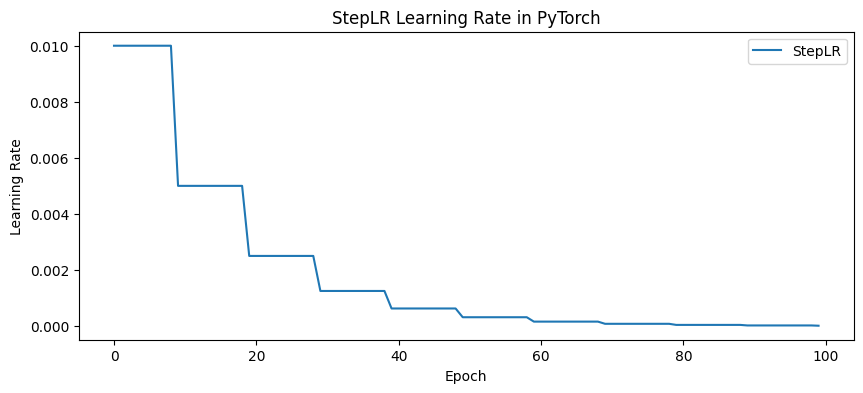

In [2]:
# Create a dummy optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.01)

# Create StepLR scheduler
epochs = 100
steps_per_epoch=10
scheduler = StepLR(optimizer, step_size=10, gamma=0.5)

lr_values = []
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        optimizer.step()

    scheduler.step()
    lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'StepLR', x_axis='Epoch')


### <font color = 'indianred'> **ExponentialLR**</font>

```python
scheduler = ExponentialLR(optimizer, gamma=0.5)
```

**Explanation:**

`ExponentialLR` continuously decays the learning rate of each parameter group by a specified factor (`gamma`) after each epoch. This is different from `StepLR`, which only reduces the learning rate at fixed intervals.

- **optimizer**: The optimizer whose learning rate you wish to schedule.
  
- **gamma=0.5**: The learning rate for each parameter group is multiplied by this factor after each epoch.

**How it Works:**

1. Assume the initial learning rate is 0.1.
2. At the end of epoch 1, the learning rate becomes \(0.1 \times 0.5 = 0.05\).
3. At the end of epoch 2, the learning rate becomes \(0.05 \times 0.5 = 0.025\).
4. And so on...

**When to Use:**

`ExponentialLR` is ideal for scenarios requiring a more aggressive and continuous decay of the learning rate. It's often employed in tasks where the model benefits from rapidly reducing learning rates, especially when you want to minimize oscillations in the training loss.



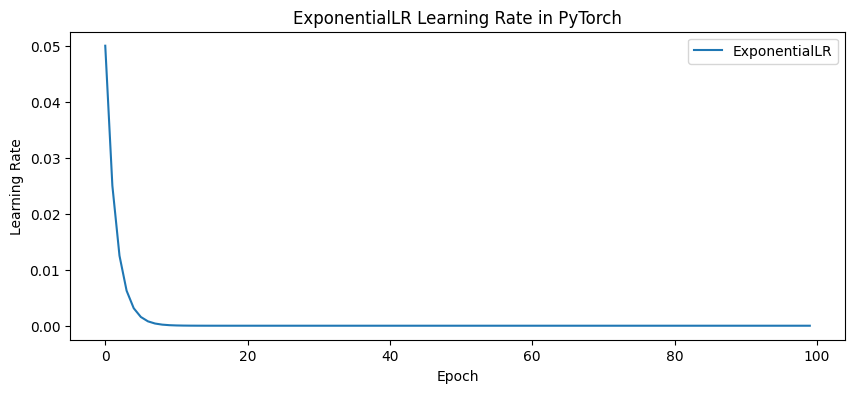

In [3]:
# Reset dummy optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.1)

# Create ExponentialLR scheduler
epochs = 100
steps_per_epoch=10
scheduler = ExponentialLR(optimizer, gamma=0.5)

lr_values = []
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        optimizer.step()
    scheduler.step()
    lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'ExponentialLR', x_axis='Epoch')


### <font color = 'indianred'> **ReduceLROnPlateau**</font>

The `ReduceLROnPlateau` scheduler adjusts the learning rate based on a monitored metric, usually the validation loss. The learning rate decreases when the metric stops improving, providing a dynamic approach to learning rate scheduling.
```python
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)
```

**Explanation:**

- **Monitored Metric**: Usually validation loss or another performance measure.
  
- **patience=2**: Number of epochs with no improvement to wait before reducing the learning rate.
  
- **factor=0.1**: Factor by which the learning rate will be reduced when the metric has plateaued.

**How it Works:**

In this example, the initial learning rate is 0.1. We simulate loss values that plateau after the first 10 epochs. When the scheduler detects that the loss hasn't improved for 2 consecutive epochs (`patience=2`), it reduces the learning rate by a factor of 0.1.

**When to Use:**

`ReduceLROnPlateau` is particularly useful in scenarios where it's unclear when to reduce the learning rate. By dynamically adapting the learning rate based on a performance metric, it allows the model to fine-tune its parameters more effectively when approaching a minimum in the loss landscape.



Epoch 00014: reducing learning rate of group 0 to 1.0000e-02.
Epoch 00017: reducing learning rate of group 0 to 1.0000e-03.
Epoch 00020: reducing learning rate of group 0 to 1.0000e-04.


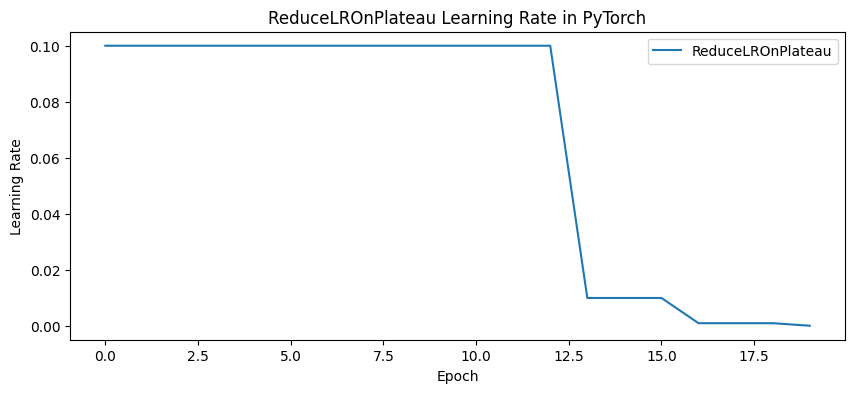

In [4]:
# Initialize the optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.1)

# Create ReduceLROnPlateau scheduler
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=2, verbose=True)

# Number of epochs
num_epochs = 20

# Simulate some loss values
loss_values = [1.0, 0.9, 0.8, 0.7, 0.6, 0.55, 0.51, 0.5, 0.49, 0.48]  # loss decreases
loss_values += [0.47]*11  # loss plateaus

lr_values = []


for epoch in range(num_epochs):
    for step in range(steps_per_epoch):
      optimizer.step()  # Optimization step
    loss = loss_values[epoch]  # Simulated loss
    scheduler.step(loss)  # Step the scheduler based on the loss
    lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'ReduceLROnPlateau', x_axis='Epoch')


### <font color = 'indianred'> **CosineAnnealingLR - 1-cycle schedule, decay each epoch**</font>

```python
scheduler = CosineAnnealingLR(optimizer, T_max=100, eta_min=0.01)
```

***Explanation:***

`CosineAnnealingLR` adjusts the learning rate according to a cosine annealing schedule, oscillating it between an initial and minimum value over a set number of epochs.

- **optimizer**: The optimizer whose learning rate you wish to schedule.
  
- **T_max=100**: Number of epochs for a full oscillation cycle.
  
- **eta_min=0.01**: The minimum learning rate.

#### How it Works:

The learning rate $( \text{lr} )$ at each epoch is computed using:

$$
\text{lr} = \eta_{\text{min}} + \frac{1}{2} (\text{lr}_{\text{initial}} - \eta_{\text{min}}) \left(1 + \cos\left(\frac{\pi \times T_{\text{current}}}{T_{\text{max}}}\right)\right)
$$
For example, at epoch 50, $$( \text{lr} = 0.01 + \frac{1}{2} (0.1 - 0.01) (1 + \cos(0.5\pi)) = 0.055 )$$

#### When to Use:

`CosineAnnealingLR` provides a balanced approach to learning rate adjustment, initially allowing the model to explore the loss landscape and then facilitating fine-tuning with a lower learning rate as training progresses. It's often used in tasks that benefit from oscillatory learning rates, such as escaping saddle points.

---

This should align well with the format and level of detail in the previous parts. Let me know if this revised version meets your needs.



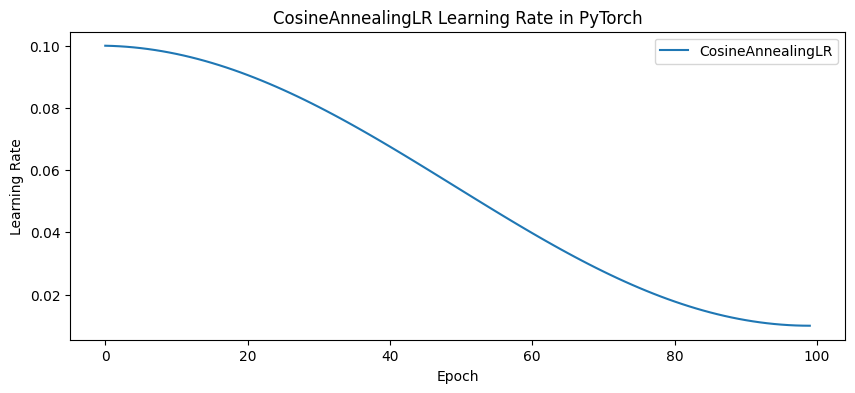

In [5]:
# Reset dummy optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.1)

# Create CosineAnnealingLR scheduler
epochs = 100
steps_per_epoch=10
scheduler = CosineAnnealingLR(optimizer, T_max=epochs, eta_min = 0.01)

lr_values = []
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        optimizer.step()
    scheduler.step()
    lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'CosineAnnealingLR', x_axis='Epoch')

### <font color = 'indianred'> **CosineAnnealingLR - Cosine Annealing with Restarts**</font>

```python
scheduler = CosineAnnealingLR(optimizer, T_max=100/10, eta_min=0.01)
```

***Explanation:***

This variant of `CosineAnnealingLR` includes restarts, allowing the learning rate to oscillate more frequently. Here, the learning rate undergoes 10 half cycles over 100 epochs.

- **optimizer**: The optimizer whose learning rate you wish to schedule.
  
- **T_max=10**: Number of epochs per half cycle (100 total epochs / 10 half cycles).
  
- **eta_min=0.01**: The minimum learning rate.

**How it Works:**

The learning rate starts at its initial value and decreases to the minimum over each half cycle of 10 epochs. After each half cycle, it resets to the initial value, repeating this pattern 10 times over the course of 100 epochs.

**When to Use:**

1. **Quick Convergence**: Frequent oscillations may lead to quicker convergence, useful when time is a constraint.
2. **Escape Local Minima**: The restarts can help the model escape shallow local minima.
3. **Stochastic Nature of Mini-Batches**: Frequent oscillations offer implicit regularization for noisy gradients or high-variance datasets.
4. **Fine-Tuning**: Useful for fine-tuning a pre-trained model in fewer epochs, though care must be taken to avoid overfitting.


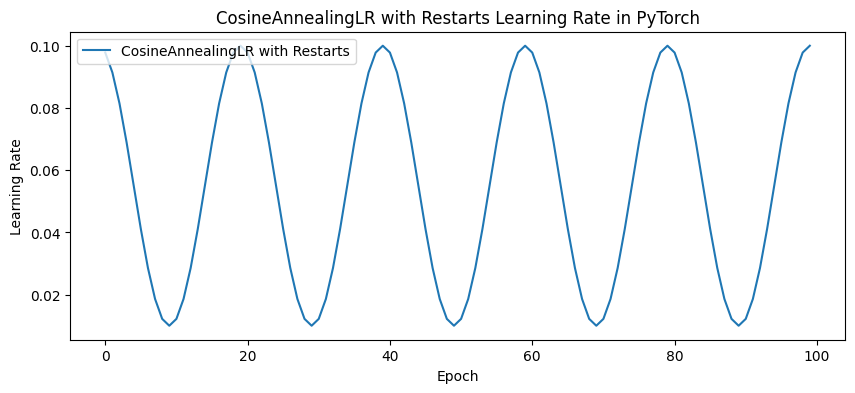

In [6]:
# Reset dummy optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.1)
from torch.optim.lr_scheduler import CosineAnnealingLR

# Create CosineAnnealingLR scheduler
epochs = 100
steps_per_epoch=10
scheduler = CosineAnnealingLR(optimizer, T_max=epochs/steps_per_epoch, eta_min = 1e-2)

lr_values = []
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        optimizer.step()
    scheduler.step()
    lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'CosineAnnealingLR with Restarts', x_axis='Epoch')

### <font color = 'indianred'> **CosineAnnealingWarmRestarts**</font>

```python
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=10, eta_min=0.01, T_mult=2)
```

**Explanation:**

`CosineAnnealingWarmRestarts` varies the learning rate according to a cosine schedule with warm restarts, extending each cycle's length based on a multiplier.

- **optimizer**: The optimizer for which you're scheduling the learning rate.
  
- **T_0=10**: Initial number of steps (batches per epoch) for the first cycle.
  
- **eta_min=0.01**: The minimum learning rate that the scheduler will set.
  
- **T_mult=2**: Multiplier to increase the cycle length after each restart.

**How it Works:**

The learning rate initially follows a half-cycle over 10 steps, decreasing to 0.01 and then returning to its initial value. Each subsequent cycle's length is doubled due to \(T_{\text{mult}} = 2\).

**When to Use:**

1. **Early Exploration**: More frequent restarts early in training allow more aggressive exploration of the loss landscape.
2. **Late Refinement**: Longer cycles later in training provide time for the model to fine-tune its parameters.
3. **Avoiding Local Minima**: Warm restarts can help escape local minima by periodically resetting the learning rate.




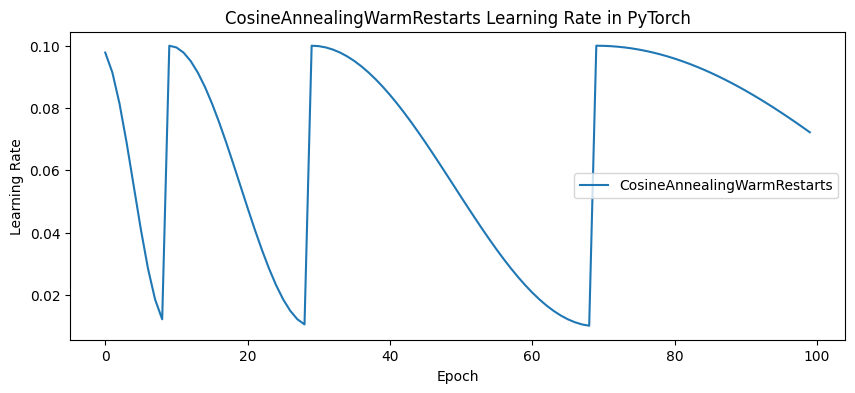

In [7]:
# Reset dummy optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.1)

# Create CosineAnnealingLR scheduler
epochs = 100
steps_per_epoch=10
scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=steps_per_epoch, eta_min = 1e-2, T_mult=2)

lr_values = []
for epoch in range(epochs):
    for step in range(steps_per_epoch):
        optimizer.step()
    scheduler.step()
    lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'CosineAnnealingWarmRestarts', x_axis='Epoch')

## <font color = 'indianred'> **Step Level**</font>

### Cosine Annealing with 1-Cycle Schedule, Decay Each Batch

```python
scheduler = CosineAnnealingLR(optimizer, T_max=100*10, eta_min=0.01)
```

**Explanation:**

This variation of `CosineAnnealingLR` applies the cosine annealing schedule at the granularity of optimization steps (or mini-batches), rather than epochs.

- **optimizer**: The optimizer whose learning rate you want to adjust.
  
- **T_max=1000**: Total number of steps for a full oscillation cycle, calculated as \( \text{Number of epochs} \times \text{Number of batches per epoch} \).
  
- **eta_min=0.01**: The minimum learning rate.

**How it Works:**

The learning rate continuously declines from its initial value to its minimum value over \( \text{num\_steps} \), which is the total number of optimization steps.

**When to Use:**

1. **Finer Control**: Step-level adjustments provide finer control over the learning rate, which can be beneficial for certain problems or datasets.
   
2. **Large Datasets**: For large datasets where a single epoch is time-consuming, this offers more frequent learning rate adjustments.
   
3. **High Variance in Data**: Step-level adjustments can be advantageous when the dataset has a high level of variance among batches.

---


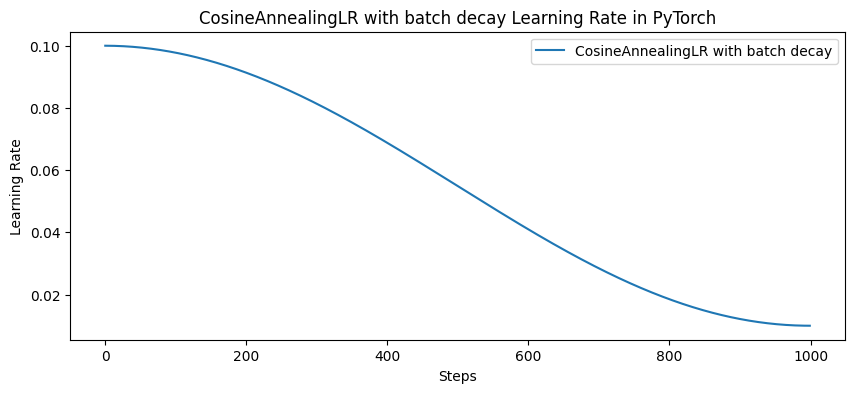

In [8]:
# Reset dummy optimizer
optimizer = torch.optim.SGD([torch.randn(1)], lr=0.1)

# Create CosineAnnealingLR scheduler
epochs = 100
num_batches_per_epoch = 10 # len(data_loader)
num_steps = 100 * num_batches_per_epoch # = 1000
scheduler = CosineAnnealingLR(optimizer, T_max=num_steps, eta_min = 1e-2)

lr_values = []
for epoch in range(epochs):
    for step in range(num_batches_per_epoch):
        optimizer.step()
        scheduler.step()
        lr_values.append(optimizer.param_groups[0]['lr'])

plot_lr_values(lr_values, 'CosineAnnealingLR with batch decay', x_axis='Steps')

### <font color = 'indianred'> **OneCycleLR**</font>

```python
scheduler = OneCycleLR(optimizer, max_lr, steps_per_epoch, epochs, div_factor, final_div_factor, pct_start, anneal_strategy)
```

**Explanation:**

`OneCycleLR` dynamically adjusts the learning rate during training, following a 1-cycle policy that allows it to vary between a maximum and minimum value.

- **optimizer**: The optimizer to which you're applying the learning rate schedule.
  
- **max_lr**: The maximum learning rate during training.
  
- **steps_per_epoch**: The number of optimization steps in one epoch.
  
- **epochs**: The total number of epochs for training.
  
- **div_factor**: Factor to compute the starting learning rate.
  
- **final_div_factor**: Factor to compute the ending learning rate.
  
- **pct_start**: Proportion of the training cycle over which the learning rate will increase.
  
- **anneal_strategy**: The annealing strategy ('cos' or 'linear').

#### How it Works:

The learning rate starts at $$( \frac{\text{Initial Learning Rate}}{\text{div_factor}} )$$ and increases until it reaches $$\text{max_lr}$$, then it tapers off to $$( \frac{\text{Initial Learning Rate}}{\text{final_div_factor}})$$

#### When to Use:

1. **Adaptive Learning Rate**: Useful when you need the learning rate to adapt to the model's performance dynamically.
   
2. **Flexible Schedules**: Can accommodate different annealing strategies and learning rate boundaries, offering flexibility.
  
3. **Various Phases of Training**: The one-cycle policy is effective for both the exploration and exploitation phases of the training process.




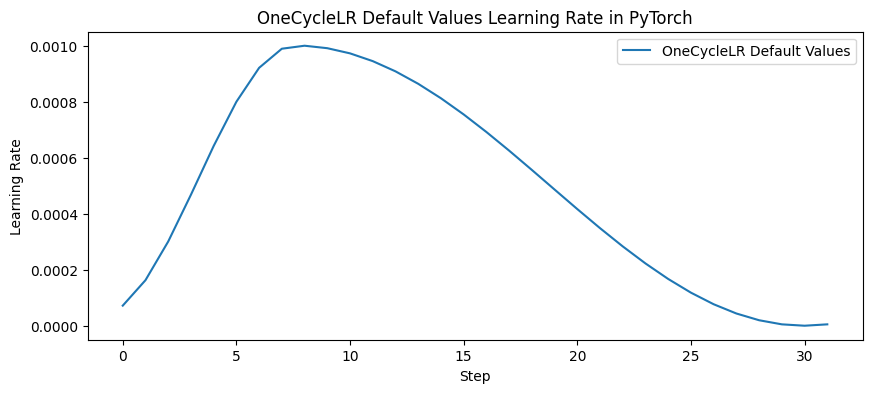

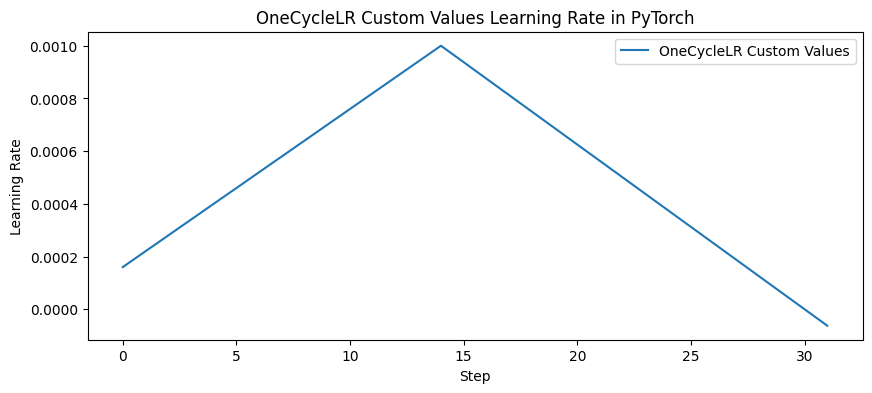

In [11]:
# Modify the existing function to use the new plot_lr_values function
def plot_one_cycle_lr_with_defaults(title_suffix, steps_per_epoch=8, epochs=np.arange(0, 4),
                                    div_factor=25.0, final_div_factor=1e4, pct_start=0.3, anneal_strategy='cos'):
    optimizer = torch.optim.SGD([torch.randn(1)], lr=0.01)  # Dummy optimizer
    total_steps = len(epochs) * steps_per_epoch  # Total number of steps in training

    scheduler = OneCycleLR(optimizer,
                           max_lr=1e-3,  # Upper learning rate boundaries in the cycle for each parameter group
                           steps_per_epoch=steps_per_epoch,  # The number of steps per epoch to train for
                           epochs=len(epochs),
                           div_factor=div_factor,
                           final_div_factor=final_div_factor,
                           pct_start=pct_start,
                           anneal_strategy=anneal_strategy)  # Specifies the annealing strategy

    # Collect learning rates
    lr_values = []
    # Simulate training loop
    for epoch in epochs:
        for _ in range(steps_per_epoch):
            optimizer.step()  # Dummy optimization step
            scheduler.step()  # Update learning rate
            lr_values.append(optimizer.param_groups[0]['lr'])

    # Use the plot function to plot the learning rates
    plot_lr_values(lr_values, f'OneCycleLR {title_suffix}', x_axis='Step')

# Example usage
plot_one_cycle_lr_with_defaults('Default Values')
plot_one_cycle_lr_with_defaults('Custom Values', div_factor=10.0, final_div_factor=1e5, pct_start=0.5, anneal_strategy='linear')


## <font color = 'indianred'> **Summary: Most Commonly Used Learning Rate Scheduler in Image Classification**</font>

In image classification tasks, the choice of learning rate scheduler can significantly impact model performance. While various schedulers offer different benefits, a few stand out for their widespread use and effectiveness in image classification scenarios:

**1. OneCycleLR**

```python
scheduler = OneCycleLR(optimizer, max_lr, steps_per_epoch, epochs, div_factor, final_div_factor, pct_start, anneal_strategy)
```

- **Why It's Used**: OneCycleLR provides a dynamic adjustment of the learning rate, making it suitable for scenarios where the model needs to adapt quickly to different phases of training.

**2. CosineAnnealingLR - Cosine Annealing with Restarts**

```python
scheduler = CosineAnnealingLR(optimizer, T_max=100/10, eta_min=0.01)
```
- **Why It's Used**: This scheduler allows the model to escape local minima and offers good performance in terms of speed and accuracy. It's particularly useful when you're fine-tuning a pre-trained model.


**3. StepLR**

```python
scheduler = StepLR(optimizer, step_size=20, gamma=0.5)
```

- **Why It's Used**: StepLR is straightforward and effective for reducing the learning rate at predefined intervals, often leading to stable training and good generalization.
---



More Schedulers: https://towardsdatascience.com/a-visual-guide-to-learning-rate-schedulers-in-pytorch-24bbb262c863





